<a href="https://colab.research.google.com/github/sammainahkinya1404/Programming-Reboot/blob/main/Hierachical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5]],
 'dcoord': [[0.0, 2.0, 2.0, 0.0],
  [0.0, 3.4641016151377544, 3.4641016151377544, 2.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 3.4641016151377544, 3.4641016151377544, 2.0],
  [3.4641016151377544,
   5.196152422706632,
   5.196152422706632,
   3.4641016151377544]],
 'ivl': ['2', '0', '1', '4', '3', '5'],
 'leaves': [2, 0, 1, 4, 3, 5],
 'color_list': ['C1', 'C1', 'C2', 'C2', 'C0'],
 'leaves_color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2']}

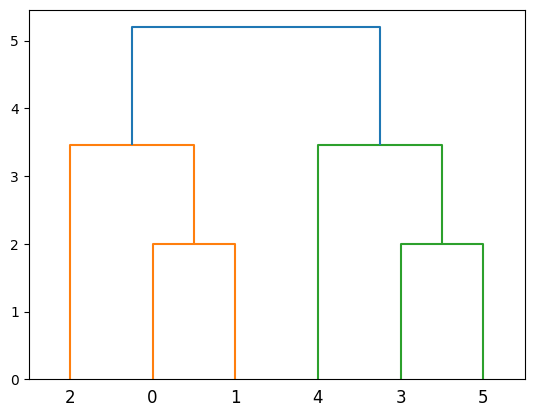

In [2]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

# Sample data
data = np.array([
    [1, 2], [1, 4], [1, 0],
    [4, 2], [4, 4], [4, 0]
])

# Perform hierarchical clustering using ward linkage
linked = linkage(data, method='ward')

# Plot the dendrogram
dendrogram(linked)


In [3]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(data)

print("Cluster labels (Agglomerative):", labels)


Cluster labels (Agglomerative): [1 1 1 0 0 0]


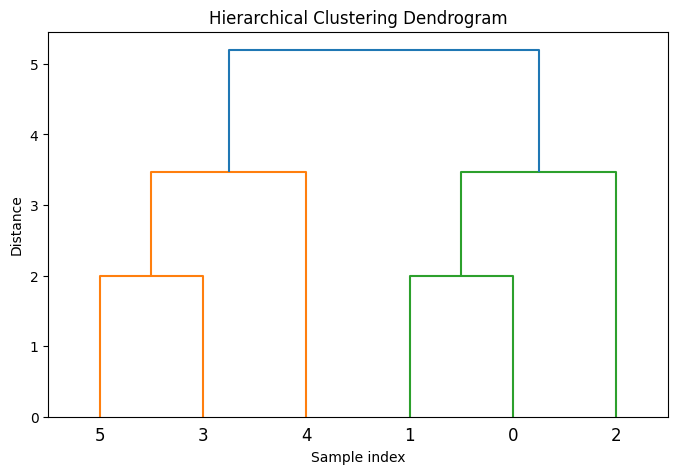

In [4]:
import matplotlib.pyplot as plt

# Plotting a more detailed dendrogram
plt.figure(figsize=(8, 5))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


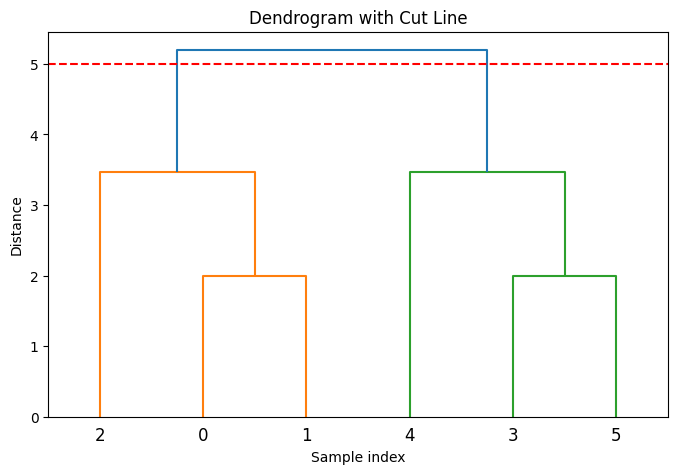

In [5]:
# Drawing a horizontal line to indicate the cut for clusters
plt.figure(figsize=(8, 5))
dendrogram(linked)
plt.axhline(y=5, color='r', linestyle='--')
plt.title('Dendrogram with Cut Line')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [6]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(data, labels)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.2871407974806454


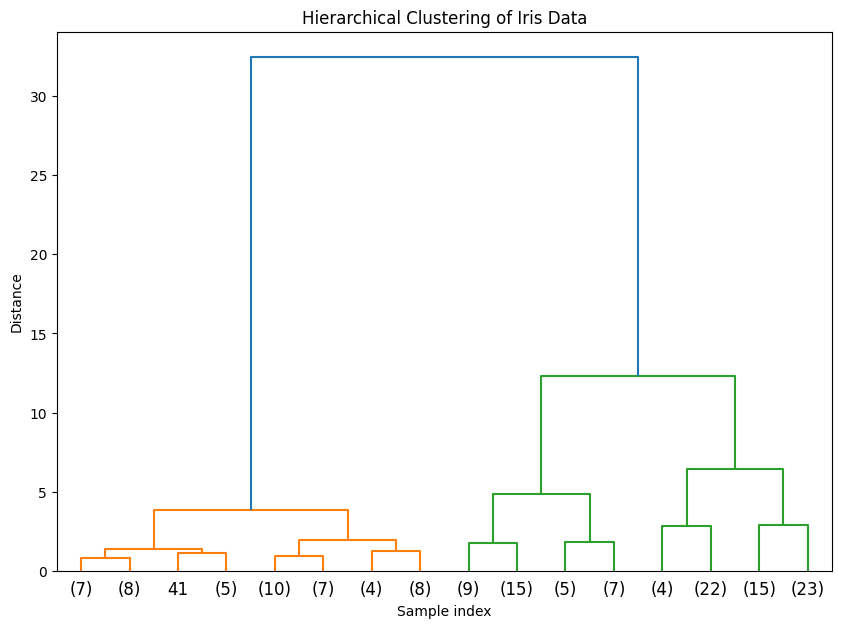

In [7]:
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
X = iris.data

# Perform hierarchical clustering
linked_iris = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked_iris, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering of Iris Data')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


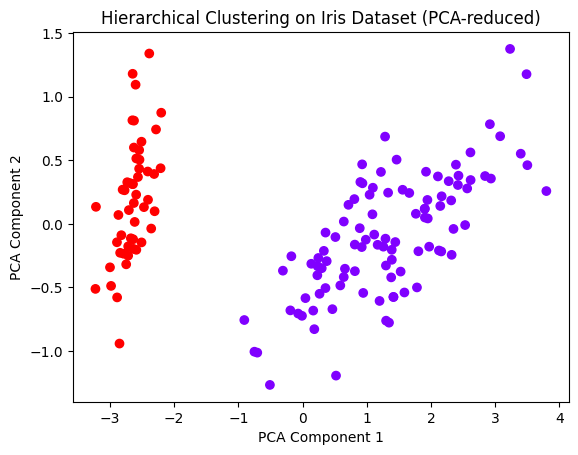

In [11]:
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Assuming 'labels' should correspond to the entire dataset, let's create a sample
# labeling for demonstration purposes. You'll need to replace this with your actual
# clustering results.
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(X_pca)
labels = clustering.labels_

# Plotting the clustered data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title('Hierarchical Clustering on Iris Dataset (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering

# Sample documents
documents = [
    "Data science is an interdisciplinary field.",
    "Machine learning is a part of data science.",
    "Artificial intelligence is a branch of computer science.",
    "Machine learning enables computers to learn from data."
]

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(documents).toarray()

# Apply Agglomerative Clustering
doc_clustering = AgglomerativeClustering(n_clusters=2)
doc_labels = doc_clustering.fit_predict(X_tfidf)

print("Document Cluster Labels:", doc_labels)


Document Cluster Labels: [0 0 1 0]
